In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload


In [2]:
import sys
import os

# Ensure you are in the correct directory
os.chdir(r'G:\Programming\10_Academy\solar_radiation_EDA')

# Add the root directory to the Python path
sys.path.append(os.getcwd())
from scripts.analysis_script import *
import scripts.analysis_script as analysis_script

df_benin =pd.read_csv('data/benin-malanville.csv')
df_sierraleone =pd.read_csv('data/sierraleone-bumbuna.csv')
df_togo =pd.read_csv('data/togo-dapaong_qc.csv')
# print(df.head())
#copy of the dataframes
df_benin_cleaned=None
df_sierraleone_cleaned=None
df_togo_cleaned=None

In [3]:
import sys
print(sys.path)


['C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python312\\python312.zip', 'C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python312\\DLLs', 'C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python312\\Lib', 'C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python312', 'g:\\Programming\\10_Academy\\solar_radiation_EDA\\.venv', '', 'g:\\Programming\\10_Academy\\solar_radiation_EDA\\.venv\\Lib\\site-packages', 'g:\\Programming\\10_Academy\\solar_radiation_EDA\\.venv\\Lib\\site-packages\\win32', 'g:\\Programming\\10_Academy\\solar_radiation_EDA\\.venv\\Lib\\site-packages\\win32\\lib', 'g:\\Programming\\10_Academy\\solar_radiation_EDA\\.venv\\Lib\\site-packages\\Pythonwin', 'G:\\Programming\\10_Academy\\solar_radiation_EDA']


In [ ]:
#check missing values in each column
check_missing_value(df_benin)
check_missing_value(df_sierraleone)
check_missing_value(df_togo)

### Removing negative values
Since the negative values have no meaning and they are the result of measurement errors , they should be replaced with zero

In [3]:
#Replacing negative values in 'GHI', 'DNI', 'DHI' with zero since they are measuremet errors
df_benin_cleaned=replace_nagative_values(df_benin)
df_sierraleone_cleaned=replace_nagative_values(df_sierraleone)
df_togo_cleaned=replace_nagative_values(df_togo)
#Replace the outliers of 'ModA', 'ModB','WS', 'WSgust'
df_benin_cleaned=outliers_fun(df_benin_cleaned,['ModA', 'ModB','WS', 'WSgust'])
df_sierraleone_cleaned=outliers_fun(df_sierraleone_cleaned,['ModA', 'ModB','WS', 'WSgust'])
df_togo_cleaned=outliers_fun(df_togo_cleaned,['ModA', 'ModB','WS', 'WSgust'])

In [9]:
#summary statistics
summary_statistics(df_benin_cleaned)
summary_statistics(df_sierraleone_cleaned)
summary_statistics(df_togo_cleaned)

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,231.718786,151.258469,116.444352,225.884852,219.188607,27.751788,55.013160,2.331217,3.175654,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,321.691953,250.956962,156.520714,316.938883,307.332783,4.758023,28.778732,1.388161,1.770292,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,421.900000,410.100000,31.100000,80.800000,3.200000,4.300000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1178.000000,1143.000000,41.400000,99.800000,6.700000,8.800000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


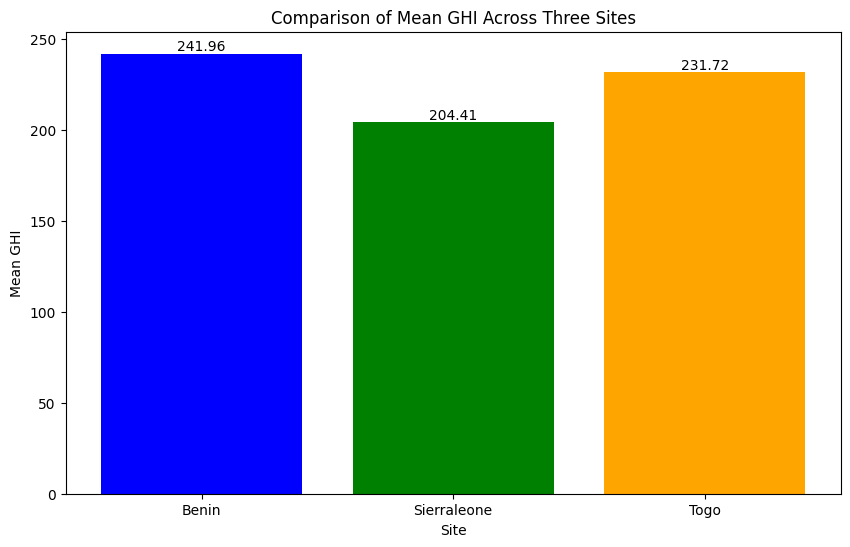

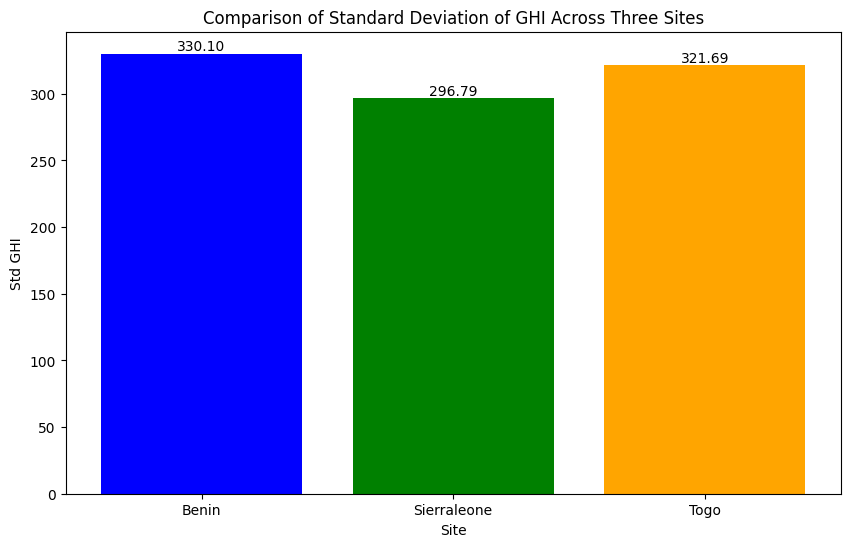

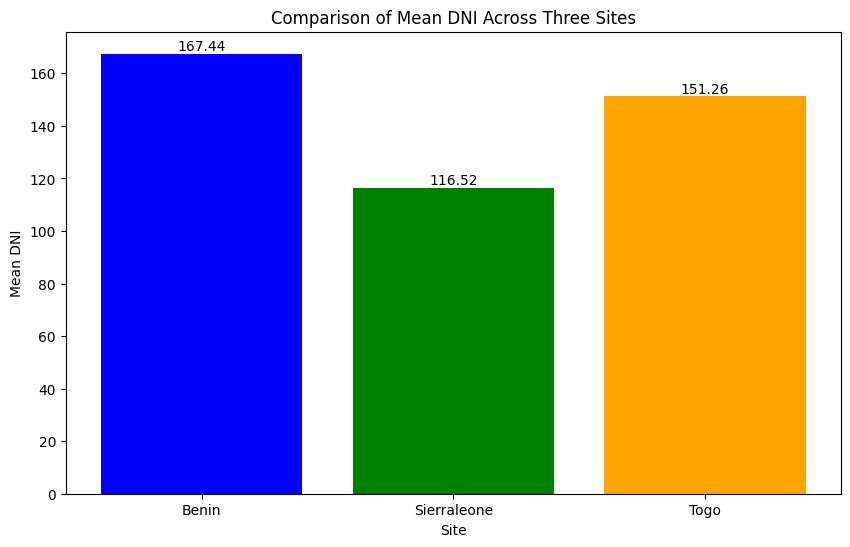

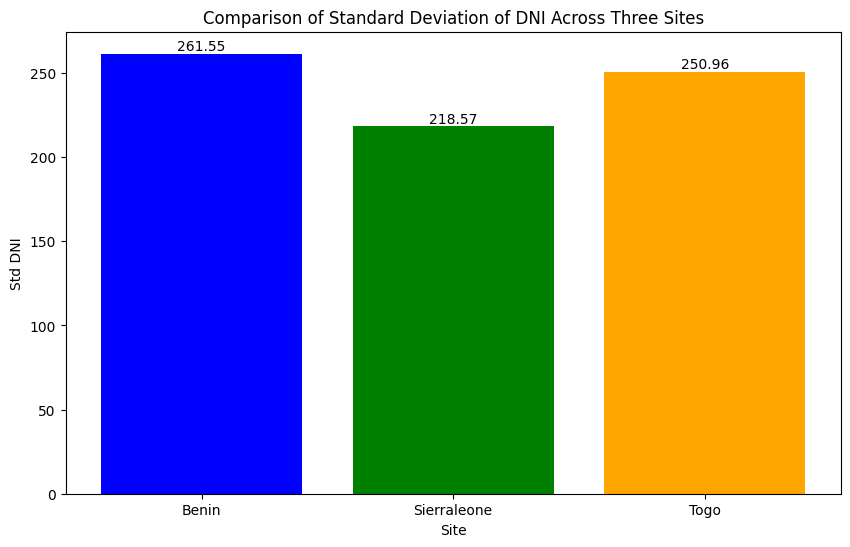

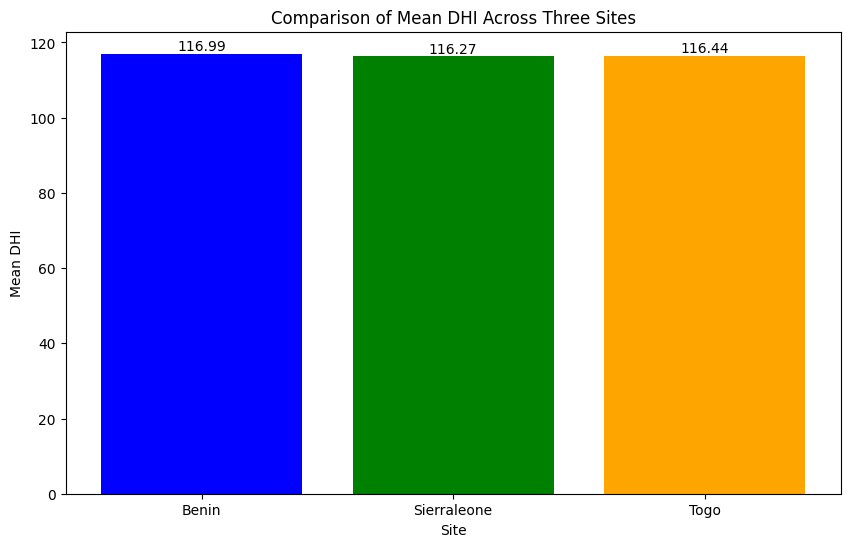

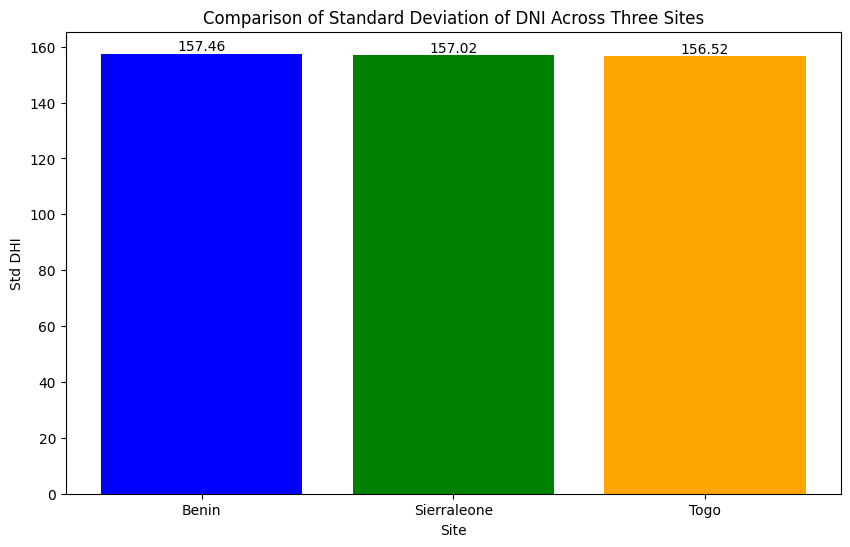

In [5]:
#compare the mean, median and standard deviation of 'GHI', 'DNI', 'DHI' of the sites
mean_median_std_comparison(df_benin_cleaned,df_sierraleone_cleaned,df_togo_cleaned)

In [ ]:
#Time series analysis of GHI, DNI, DHI and Tamb over an hour
plot_over_an_hour(df_benin_cleaned,df_sierraleone_cleaned,df_togo_cleaned)


In [ ]:
#Time series analysis of GHI, DNI, DHI and Tamb over a day
plot_over_a_day(df_benin_cleaned,df_sierraleone_cleaned,df_togo_cleaned)


In [ ]:
#Time series analysis of GHI, DNI, DHI and Tamb over a month
plot_over_a_month(df_benin_cleaned,df_sierraleone_cleaned,df_togo_cleaned)

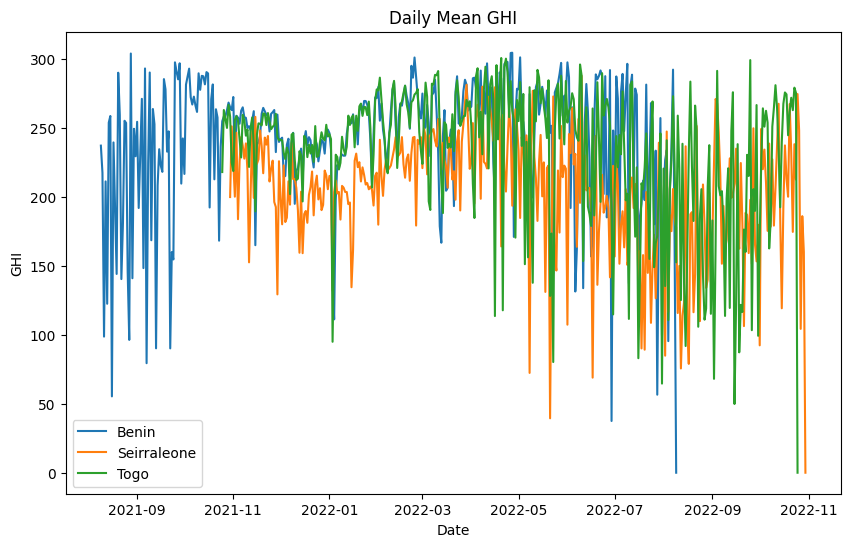

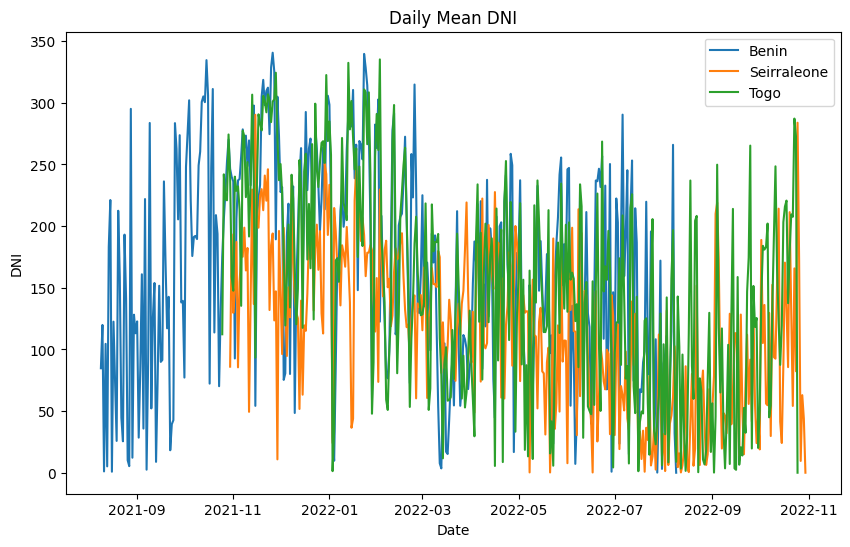

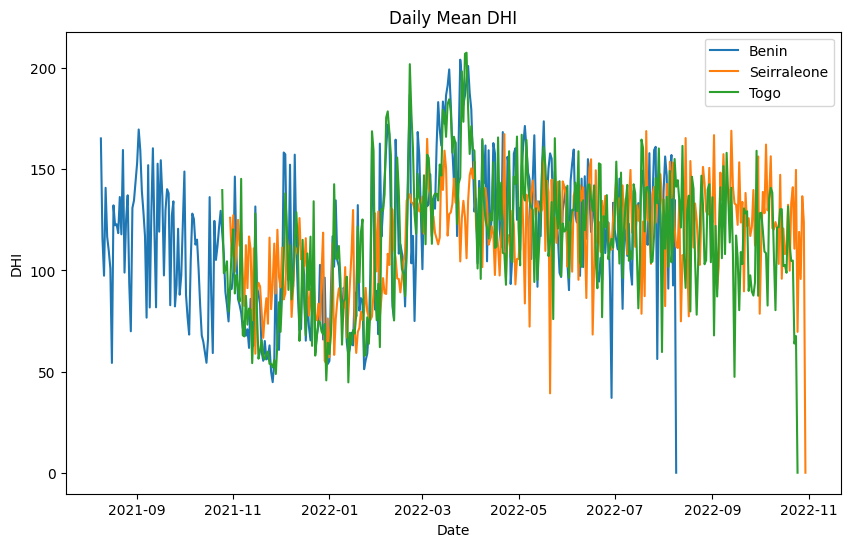

In [10]:
plot_daily_mean(df_benin_cleaned,df_sierraleone_cleaned,df_togo_cleaned)

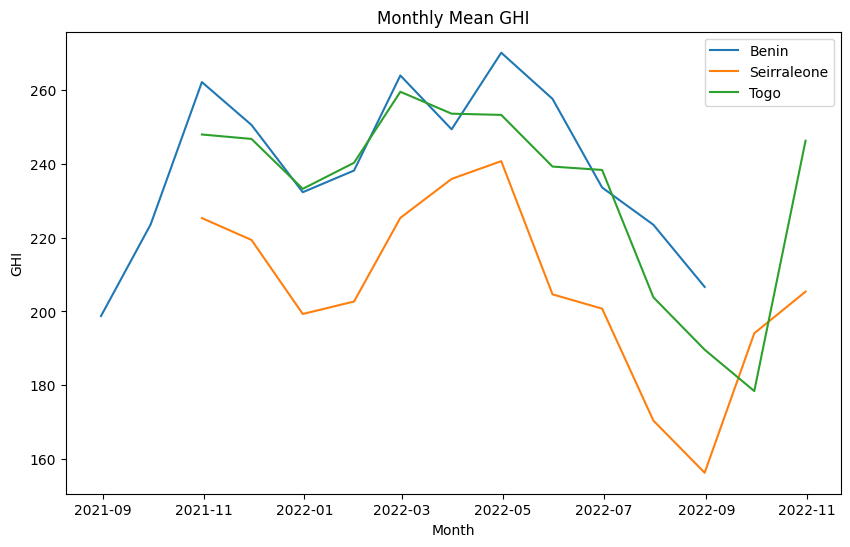

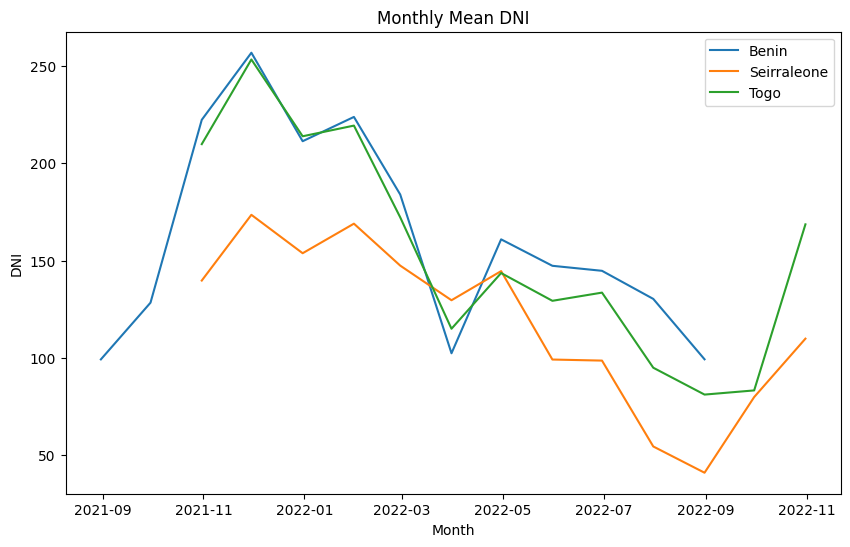

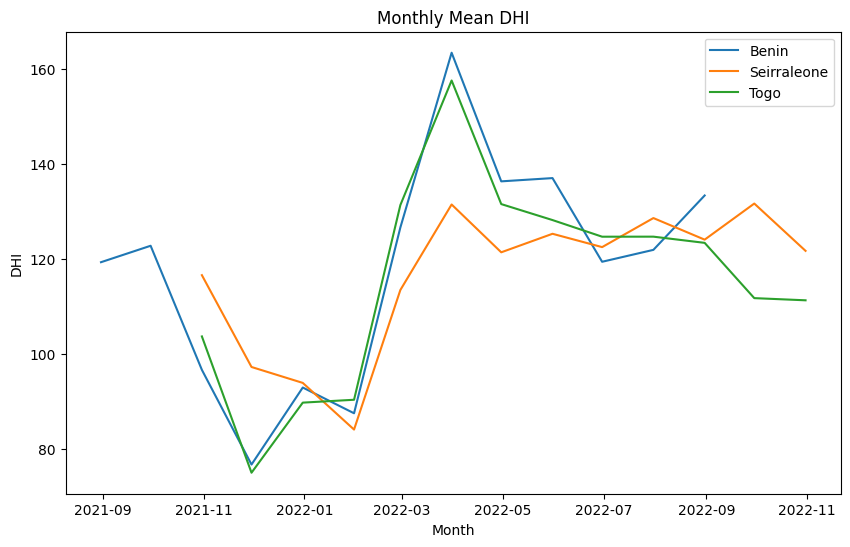

In [11]:
plot_monthly_mean(df_benin_cleaned,df_sierraleone_cleaned,df_togo_cleaned)

In [4]:
#merging all the datas for correlation analysys
merged_df=merge_df(df_benin_cleaned,df_sierraleone_cleaned,df_togo_cleaned)
# print(merged_df.head())

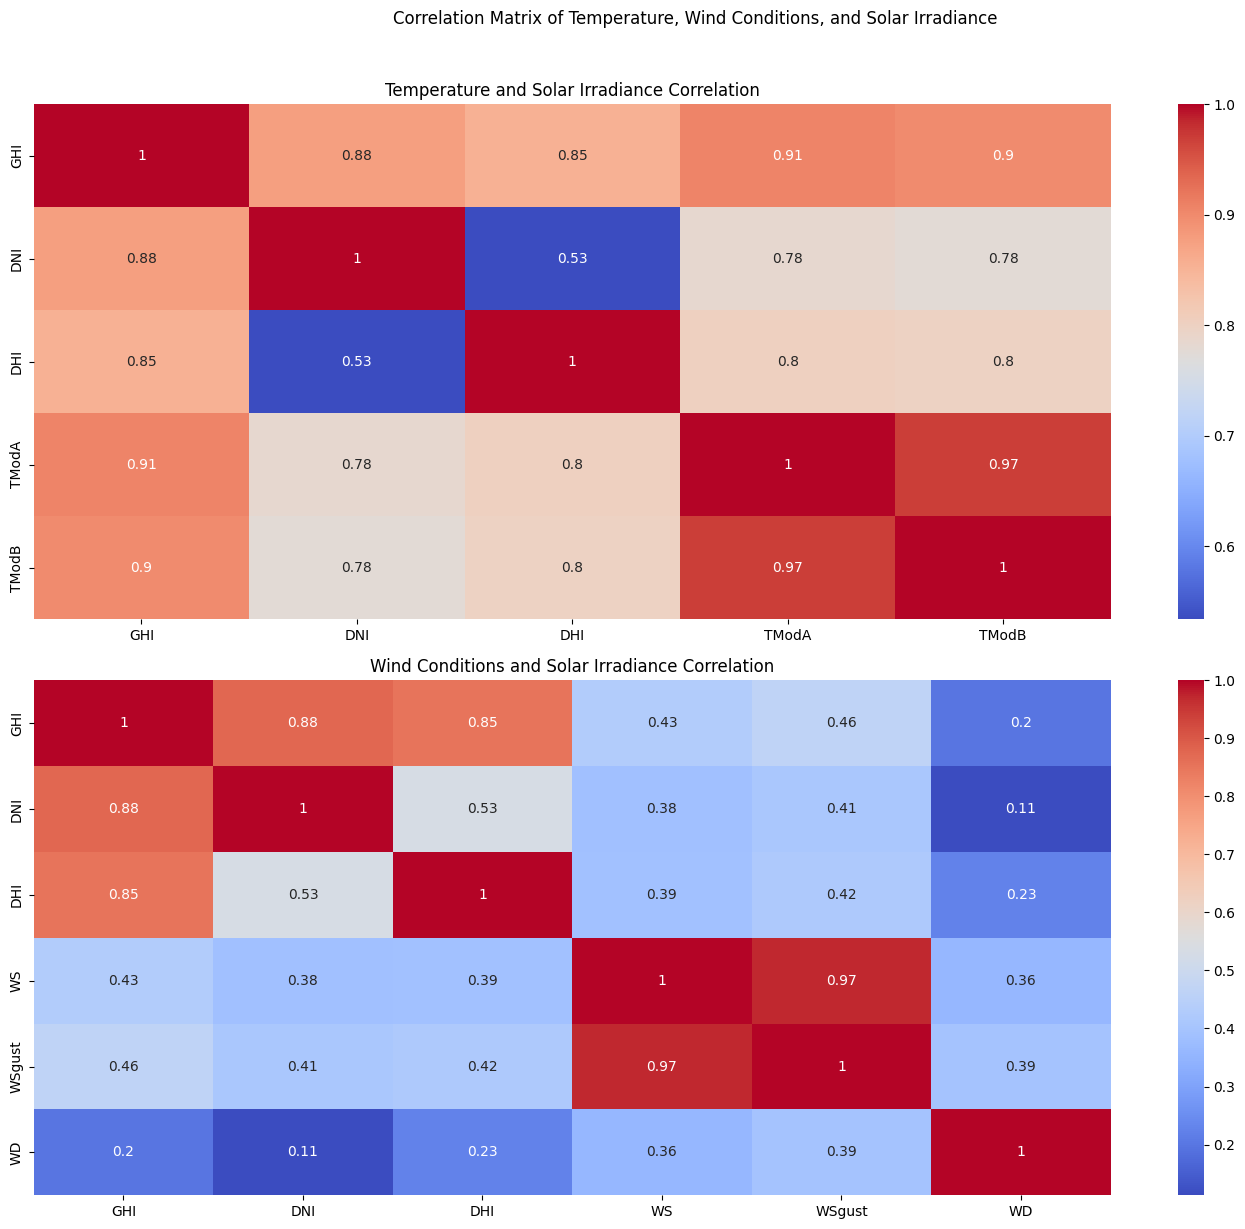

In [7]:
#correlation analysys on the merged data
correlation(merged_df)

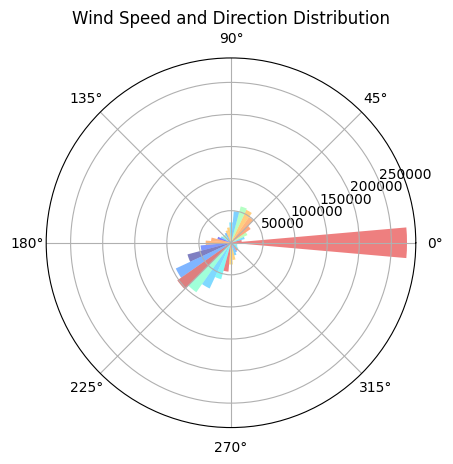

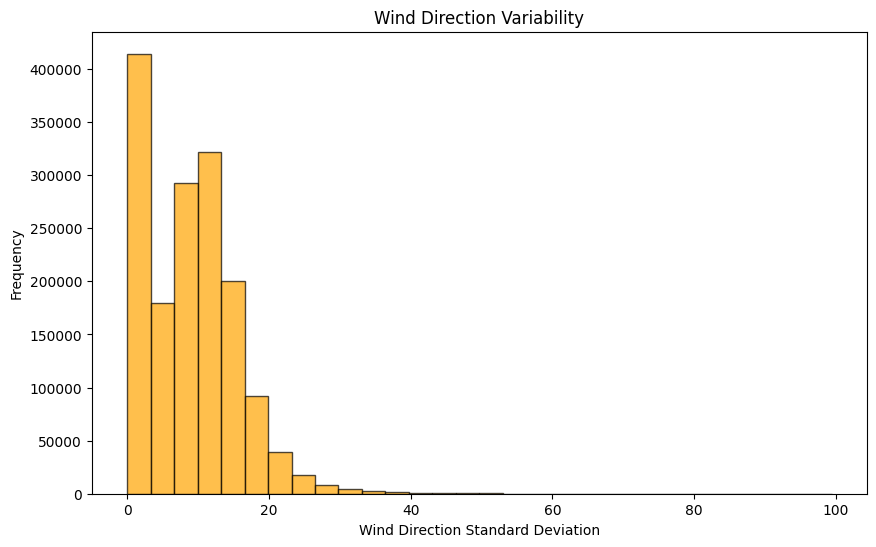

In [12]:
#wind analysis
polar_plot(merged_df)


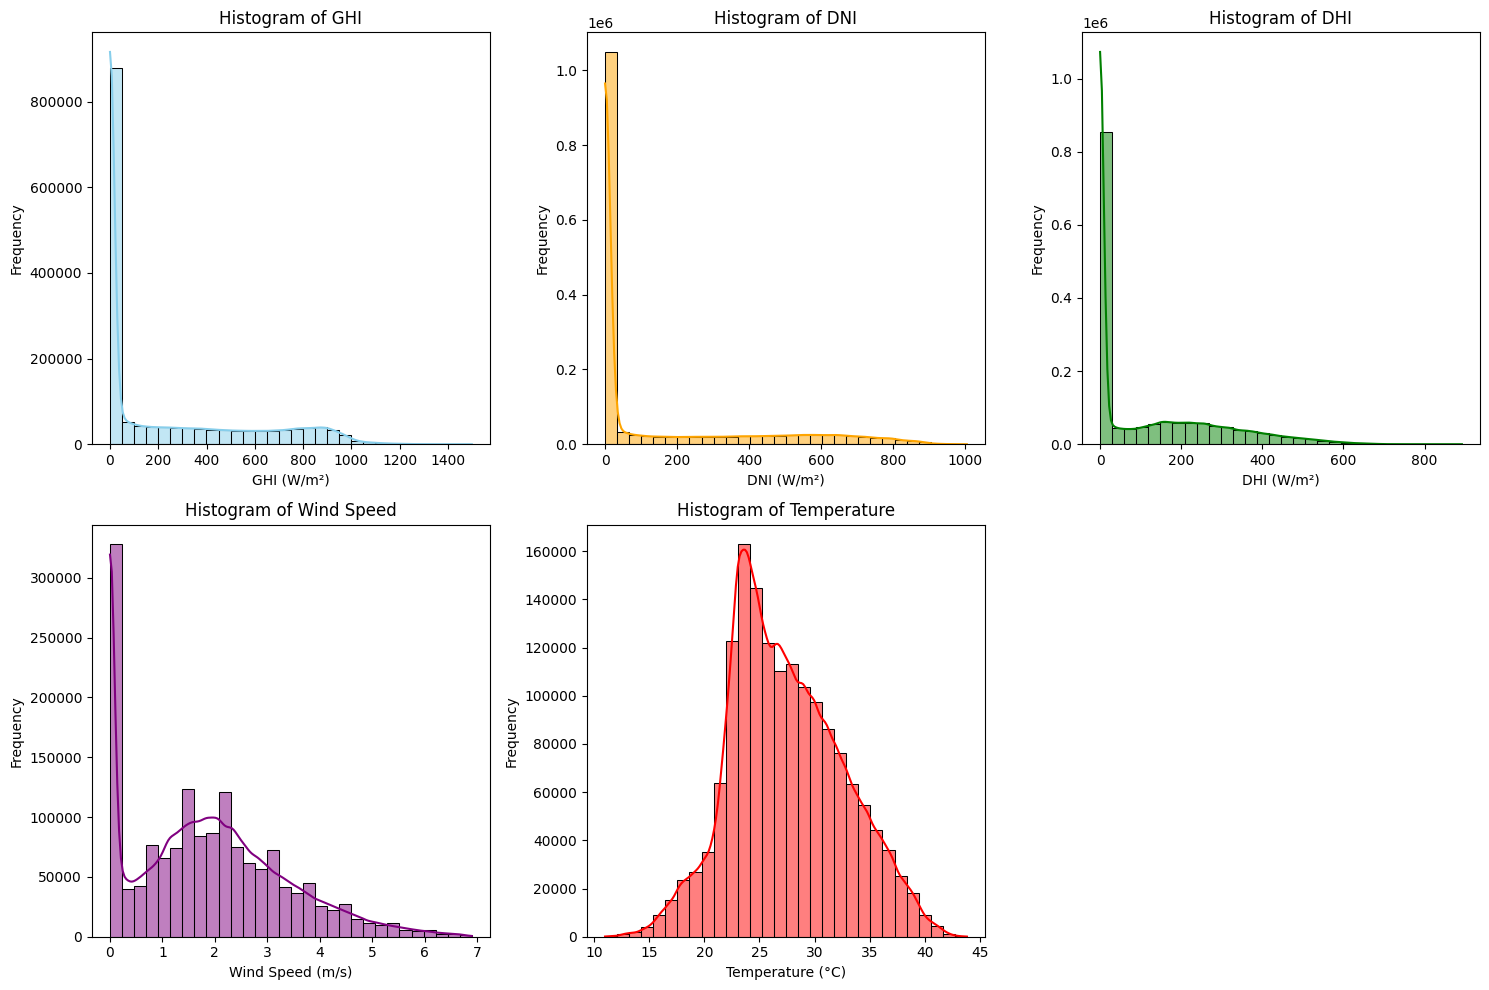

In [13]:
# frequency distributon histograms
frequency_distribution(merged_df)

In [ ]:
#bubble chart to show relationship between variables
bubble_chart(merged_df)